In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import statistics

In [44]:
df = pd.read_csv("./output_Ndataframe.csv")

In [4]:
df = pd.read_feather("./dataframe.feather")

In [39]:
df.sample(10)


Number of tuggers  Number of stations      Buffer Size  \
112                 11                   2  [3, 3, 3, 3, 3]   
31                   3                   2  [3, 3, 3, 3, 3]   
22                   2                   2  [3, 3, 3, 3, 3]   
82                   8                   2  [3, 3, 3, 3, 3]   
138                 13                   2  [3, 3, 3, 3, 3]   
105                 10                   2  [3, 3, 3, 3, 3]   
5                    0                   2  [3, 3, 3, 3, 3]   
4                    0                   2  [3, 3, 3, 3, 3]   
25                   2                   2  [3, 3, 3, 3, 3]   
81                   8                   2  [3, 3, 3, 3, 3]   

     Average Idle Times[min]  
112                35.830000  
31                 90.616667  
22                233.730000  
82                 56.716667  
138                19.830000  
105                28.016667  
5                 862.200000  
4                 862.200000  
25                215.680000  
81                 45.666667

In [5]:
df_grouped = df.groupby(["Tugger N"]).agg(Idle_1=pd.NamedAgg(column="Idle_time_1", aggfunc=lambda x: max(x)/60),
                                          Idle_2=pd.NamedAgg(column="Idle_time_2", aggfunc=lambda x: max(x)/60),
                                          Idle_3=pd.NamedAgg(column="Idle_time_3", aggfunc=lambda x: max(x)/60),
                                          Idle_4=pd.NamedAgg(column="Idle_time_4", aggfunc=lambda x: max(x)/60),
                                          Idle_5=pd.NamedAgg(column="Idle_time_5", aggfunc=lambda x: max(x)/60),
                                       Sat_1 = pd.NamedAgg(column="Saturation_1", aggfunc=lambda x: sum(x)/len(x)),
                                       Sat_2 = pd.NamedAgg(column="Saturation_2", aggfunc=lambda x: sum(x)/len(x)),
                            )

In [6]:
df_grouped["AVG idle"] = (df_grouped.Idle_1 + df_grouped.Idle_2 + df_grouped.Idle_3 + df_grouped.Idle_4 + df_grouped.Idle_5)/5
df_grouped["AVG charging saturation"] = (df_grouped.Sat_1 + df_grouped.Sat_2)/2

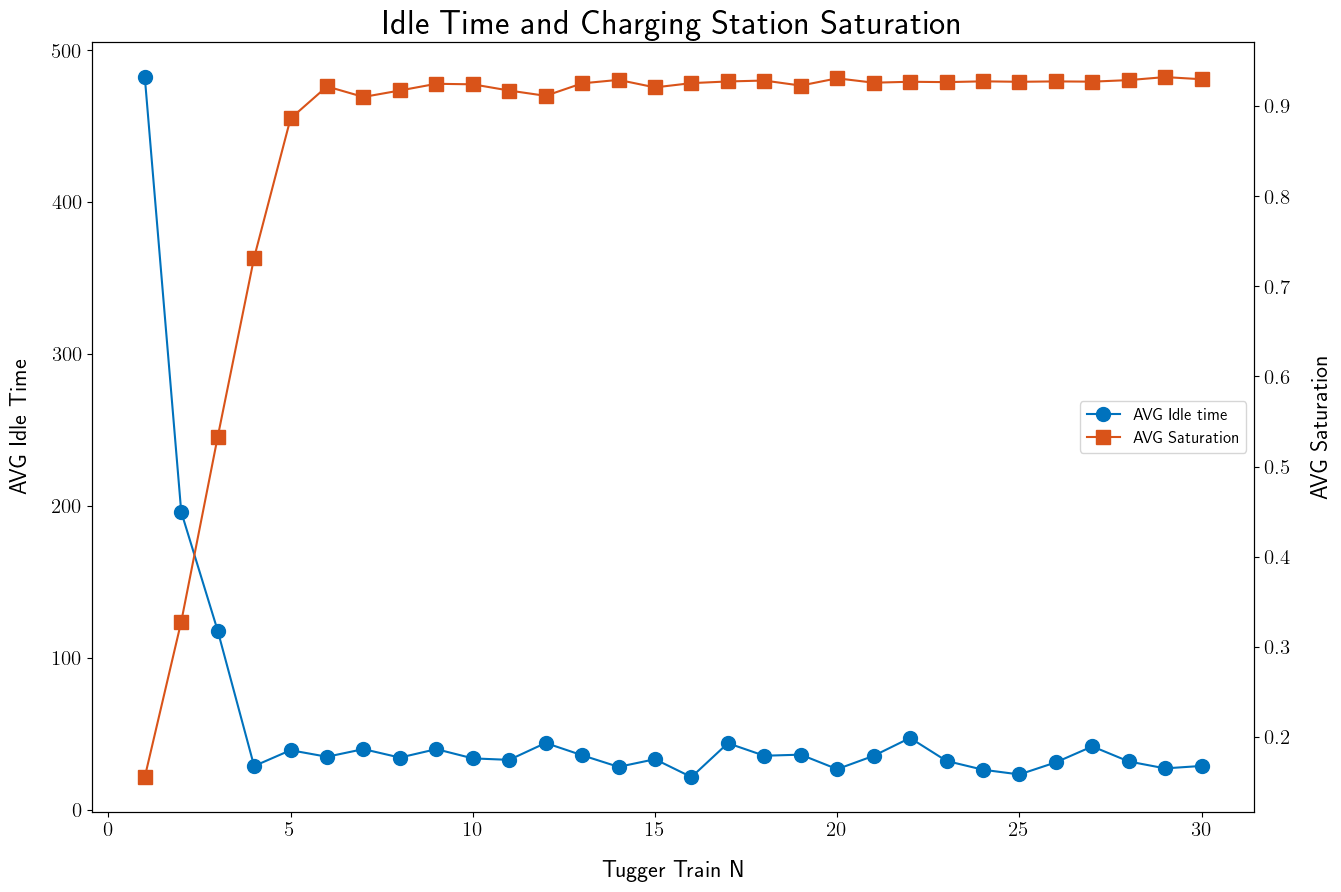

In [7]:
fig, ax = plt.subplots(figsize = (15,10))
ax.set_ylabel("AVG Idle Time",  fontdict={"fontsize":17}, labelpad = 15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlabel("Tugger Train N", fontdict={"fontsize":17}, labelpad = 15)

ax2 = ax.twinx()
ax2.set_ylabel("AVG Saturation", fontdict={"fontsize":17}, labelpad = 15)
ax2.tick_params(axis='y', which='major', labelsize=15)

lin1 = ax.plot(df_grouped["AVG idle"], label = "Idle time", color = "#0072BD", marker = "o", markersize=10)
lin2 = ax2.plot(df_grouped["AVG charging saturation"], color = "#D95319", marker = "s", markersize=10, label = "Saturation of CS")

t = ax.set_title("Idle Time and Charging Station Saturation", fontdict={"fontsize":25})

lns = lin1 + lin2
labs = ["AVG Idle time", "AVG Saturation"]
plt.legend(lns, labs, fontsize=12, loc=5)

fig.savefig("./images/idle_sat_tugger.png", dpi = 150)
plt.show()

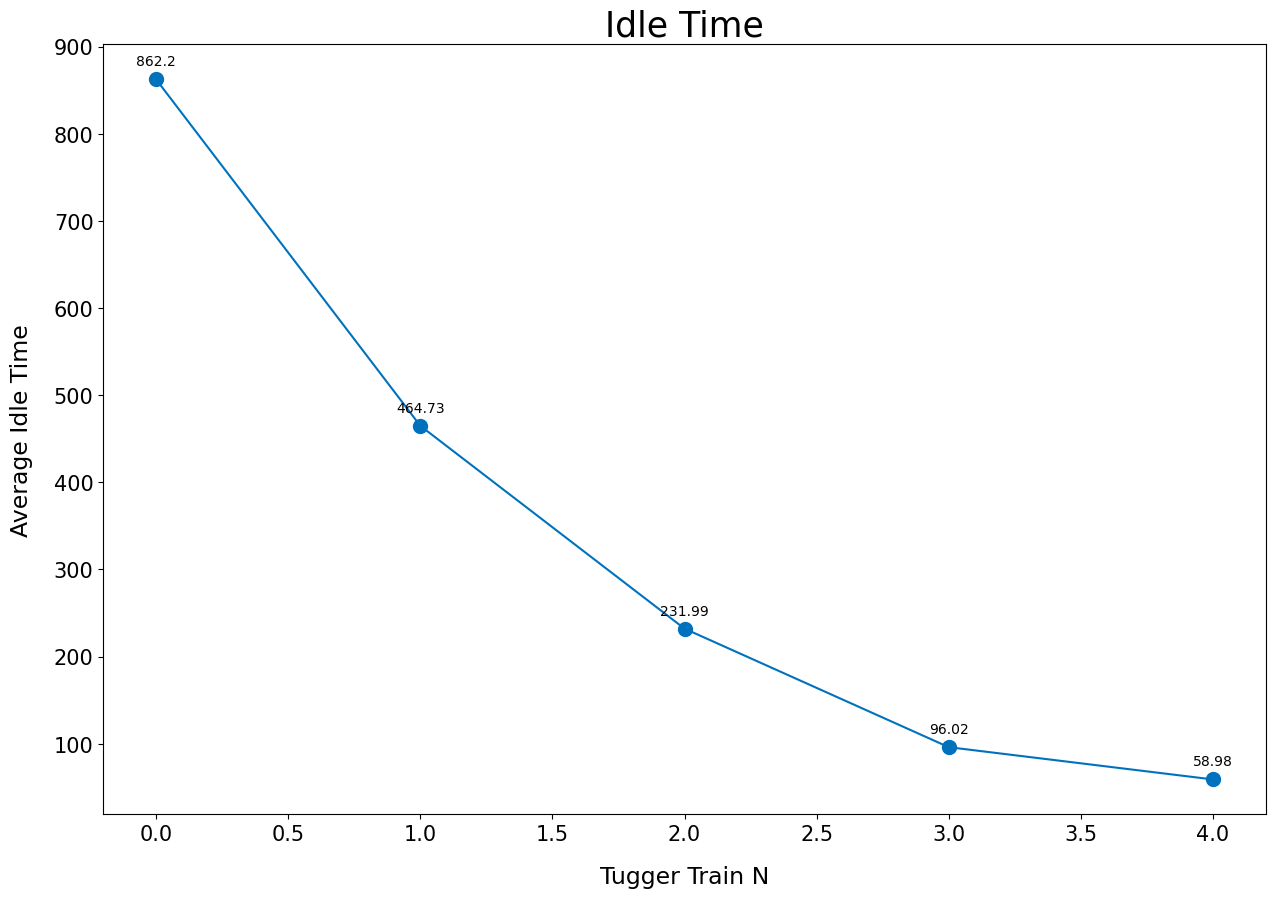

In [48]:
df_grouped
fig, ax = plt.subplots(figsize = (15,10))
ax.set_ylabel("Average Idle Time",  fontdict={"fontsize":17}, labelpad = 15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlabel("Tugger Train N", fontdict={"fontsize":17}, labelpad = 15)

lin1 = ax.plot(df_grouped["Average Idle Times[min]"], label = "Idle time", color = "#0072BD", marker = "o", markersize=10)
for i, txt in enumerate(df_grouped["Average Idle Times[min]"]):
    ax.annotate(round(txt,2), (i, df_grouped["Average Idle Times[min]"][i]), textcoords = "offset points", ha="center",xytext = (0,10))

t = ax.set_title("Idle Time", fontdict={"fontsize":25})
fig.savefig("./images/idle_sat_tugger.png", dpi = 150)
plt.show()

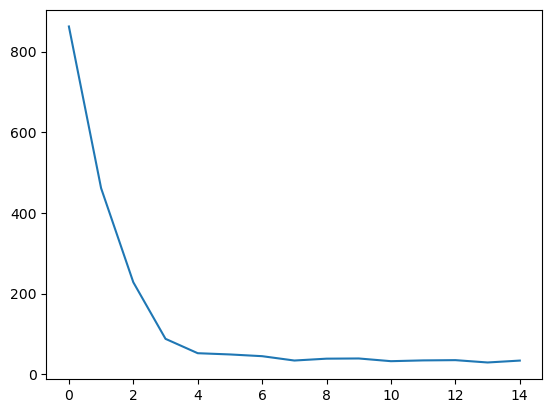

In [42]:
plt.plot(df_grouped["Average Idle Times[min]"])

In [45]:
df_grouped = df[["Number of tuggers","Average Idle Times[min]"]]

In [46]:
df_grouped = df_grouped.groupby(["Number of tuggers"]).mean()


In [16]:
import matplotlib.pyplot as plt
p = []
with open("../mean.txt", "r") as f:
    for i in f.readlines():
        p.append(float(i))

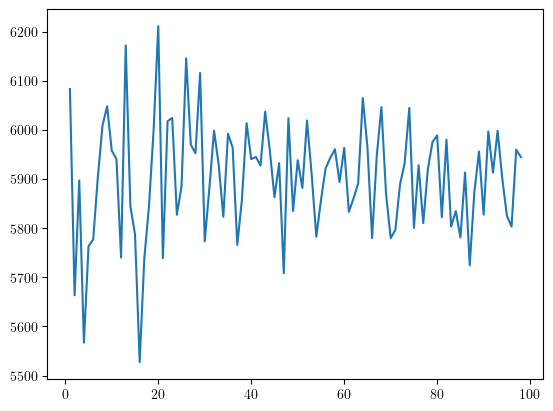

In [17]:
plt.plot([i for i in range(1,len(p)+1)], p)
plt.show()

# Create final dataframe

In [35]:
import pandas as pd
import statistics

In [36]:
df = pd.read_feather("./output_N/dataframe.feather")
df2 = pd.read_feather("./output_N/dataframe_2.feather")
df3 = pd.read_feather("./output_N/dataframe_3.feather")

In [37]:
final_dataframe = pd.concat([df, df2, df3], axis = 0)

In [38]:
final_dataframe.reset_index(inplace = True)

In [40]:
final_dataframe.drop(labels=["index"], inplace=True, axis =1)

In [43]:
final_dataframe["Buff size"]=final_dataframe["Buffer Size"].str[0]

In [44]:
final_dataframe.drop(["Buffer Size"], axis = 1, inplace = True)

In [45]:
final_dataframe

Number of tuggers  Number of stations  Average Idle Times[min]  \
0                      6                   2                36.516667   
1                      6                   3                45.680000   
2                      6                   4                51.760000   
3                      6                   2                37.440000   
4                      6                   3                58.940000   
...                  ...                 ...                      ...   
15995                  6                   2                12.056667   
15996                  6                   3                 6.463333   
15997                  6                   4                19.723333   
15998                  6                   5                27.126667   
15999                  6                   6                79.800000   

       Buff size  
0              3  
1              3  
2              3  
3              3  
4              3  
...          ...  
15995          6  
15996          6  
15997          6  
15998          6  
15999          6  

[16000 rows x 4 columns]

In [49]:
df_output = final_dataframe.groupby(["Number of stations", "Buff size"]).agg(N=pd.NamedAgg(column="Average Idle Times[min]", aggfunc=lambda x: len(x)),
                                                                MAX=pd.NamedAgg(column="Average Idle Times[min]", aggfunc=max),
                                                                MIN=pd.NamedAgg(column="Average Idle Times[min]", aggfunc=min),
                                                                AVG=pd.NamedAgg(column="Average Idle Times[min]", aggfunc=statistics.mean),
                                                                VARIANCE=pd.NamedAgg(column="Average Idle Times[min]", aggfunc=statistics.variance),
                                                                RANGE= pd.NamedAgg(column="Average Idle Times[min]", aggfunc=lambda x: max(x)-min(x))) 

In [50]:
df_output

N         MAX        MIN         AVG  \
Number of stations Buff size                                           
2                  3          800   72.846667  12.446667   41.249671   
                   4          800   65.906667   8.866667   34.848025   
                   5          800   54.856667   8.330000   28.818175   
                   6          800   47.440000   4.850000   23.442121   
3                  3          800   67.213333   8.906667   39.271700   
                   4          800   58.983333   5.440000   30.564708   
                   5          800   48.863333   2.913333   22.903971   
                   6          800   37.070000   0.156667   17.450312   
4                  3          800   66.483333   9.910000   39.556358   
                   4          800   59.023333   3.673333   30.832529   
                   5          800   45.360000   3.606667   22.443833   
                   6          800   36.196667   2.806667   16.662771   
5                  3          800  124.680000   9.713333   73.492854   
                   4          800  106.363333   3.133333   57.007167   
                   5          800   77.936667   3.333333   41.509708   
                   6          800   57.620000   1.783333   30.765346   
6                  3          800  263.986667  33.946667  149.488529   
                   4          800  218.363333  14.776667  119.440062   
                   5          800  165.230000   5.393333   91.692262   
                   6          800  124.103333   6.276667   66.741446   

                                 VARIANCE       RANGE  
Number of stations Buff size                           
2                  3           110.792404   60.400000  
                   4           104.810239   57.040000  
                   5            80.204597   46.526667  
                   6            62.779453   42.590000  
3                  3           102.146097   58.306667  
                   4            96.491343   53.543333  
                   5            63.150748   45.950000  
                   6            45.101270   36.913333  
4                  3           106.727059   56.573333  
                   4            93.280695   55.350000  
                   5            58.838870   41.753333  
                   6            42.310117   33.390000  
5                  3           364.457270  114.966667  
                   4           273.198347  103.230000  
                   5           154.262243   74.603333  
                   6           106.849076   55.836667  
6                  3          2552.271447  230.040000  
                   4          1871.217799  203.586667  
                   5          1052.941334  159.836667  
                   6           581.018543  117.826667